Привет!

Это мой первый пет-проект в качестве аналитика данных. В нем решены следующие задачи:
1. Определение коэффициентов корреляции между показателем средней рыночной стоимости одного квадратного метра общей площади жилого помещения и среднемесячной номинальной начисленной заработной платой работников по полному кругу организаций по субъектам РФ в период с конца 2021 года по настоящее время.
2. Анализ динамики изменения указанных коэффициентов в течение рассматриваемого периода.
3. Выявление субъектов с максимальной и минимальной разницами между показателями. Анализ формирования таких разниц.

Сначала найдем показатели средней рыночной стоимости одного квадратного метра общей площади жилого помещения по кварталам начиная с конца 2021 года. Возьмем их из приказов Министерства строительства и жилищно-коммунального хозяйства Российской Федерации "О нормативе стоимости одного квадратного метра общей площади жилого помещения по Российской Федерации..." (далее - Приказ).

Импортируем необходимые библиотеки.

In [1]:
import pytesseract
import re
import pandas as pd
import matplotlib.pyplot as plt

Извлечем текст из pdf-файлов помощью Tesseract OCR.

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from pdf2image import convert_from_path

def extract_text_from_pdf(pdf_path):
    # convert pdf to image
    pages = convert_from_path(pdf_path, 500, poppler_path = r'c:\Program Files\Poppler\poppler-23.07.0\Library\bin')

    # extract text from each page using Tesseract OCR
    text_data = ''
    for page in pages:
        text = pytesseract.image_to_string(page, lang='rus')
        text_data += text + '\n'
    
    # return the text data
    return text_data

text_2021Q4 = extract_text_from_pdf('1-kvartal-2022.pdf')
text_2022Q1 = extract_text_from_pdf('2-kvartal-2022.pdf')
text_2022Q2 = extract_text_from_pdf('3-kvartal-2022.pdf')
text_2022Q3 = extract_text_from_pdf('4-kvartal-2022.pdf')
text_2022Q4 = extract_text_from_pdf('1-kvartal-2023.pdf')
text_2023Q1 = extract_text_from_pdf('2-kvartal-2023.pdf')
text_2023Q2 = extract_text_from_pdf('3-kvartal-2023.pdf')

print(text_2021Q4)

ИР `.. КН т.
я . . +

| МИНИСТЕРСТВО ЮСТИЦИИ РОССИЙСКОЙ ФЕДЕРАЦИИ |

ЗАРЕГИСТРИРОВАНО

' Регистрационный № 22” ^
У

СТРОИТЕЛЬСТВА И ЖИЛИЩНО-КОММУНАЛЬНОГО
ХОЗЯИСТВА РОССИЙСКОЙ ФЕДЕРАЦИИ

(МИНСТРОЙ РОССИИ)
ПРИКАЗ
ОТ « рее рр 7 № 755, 2
Москва

О нормативе стоимости одного квадратного метра общей площади
жилого помещения по Российской Федерации на первое полугодие 2022 года и
показателях средней рыночной стоимости одного квадратного метра общей
площади жилого помещения по субъектам Российской Федерации
на Г квартал 2022 года

В соответствии с подпунктом 5.2.38 пункта 5 Положения о Министерстве
строительства и жилищно-коммунального хозяйства Российской Федерации,
утвержденного — постановлением Правительства Российской — Федерации
от 18 ноября 2013 г. № 1038 (Собрание законодательства Российской Федерации,
2013, № 47, ст. 6117; 2021, № 21, ст. 3582), приказываю:

1. Утвердить норматив стоимости одного квадратного метра общей площади
жилого помещения по Российской Федерации на первое полугод

Уберем лишние символы из текстов, чтобы они не мешали использовать регулярные выражения.

In [3]:
text_2021Q4 = text_2021Q4.replace(',', '').replace('|', '').replace('  ', ' ').replace('_', '').replace('.', '')
text_2022Q1 = text_2022Q1.replace(',', '').replace('|', '').replace('  ', ' ').replace('_', '').replace('.', '')
text_2022Q2 = text_2022Q2.replace(',', '').replace('|', '').replace('  ', ' ').replace('_', '').replace('.', '')
text_2022Q3 = text_2022Q3.replace(',', '').replace('|', '').replace('  ', ' ').replace('_', '').replace('.', '')
text_2022Q4 = text_2022Q4.replace(',', '').replace('|', '').replace('  ', ' ').replace('_', '').replace('.', '')
text_2023Q1 = text_2023Q1.replace(',', '').replace('|', '').replace('  ', ' ').replace('_', '').replace('.', '')
text_2023Q2 = text_2023Q2.replace(',', '').replace('|', '').replace('  ', ' ').replace('_', '').replace('.', '')

С помощью регулярных выражений выделим из текста субъекты РФ. Нам важно сохранить их порядок в соответствии с Приказом, чтобы в дальнейшем корректно выделить соответствующие субъектам показатели, поэтому используем такой подход.

In [4]:
re_subjects = r'(.+область)|(.+Республика.+)|(.+Республика)|(Республика[^0-9\n]*)|(.+край)|(.+автономный округ)|(Город федерального значения\s\S+)'

subjects_t = re.findall(re_subjects, text_2021Q4)

#print(subjects_t)

# удалим лишнее

subjects_l = []

for i in subjects_t:
    for k in i:
        if len(k) > 0:
            subjects_l.append(k)

#print(subjects_l)

# кое-где остались лишние пробелы в конце строк, тоже удалим

subjects = []

for i in subjects_l:
    i = i.rstrip(' ')
    subjects.append(i)

print(subjects)

['Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область', 'Ивановская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'Московская область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тверская область', 'Тульская область', 'Ярославская область', 'Город федерального значения Москва', 'Республика Карелия', 'Республика Коми', 'Архангельская область', 'Вологодская область', 'Калининградская область', 'Ленинградская область', 'Мурманская область', 'Новгородская область', 'Псковская область', 'Ненецкий автономный округ', 'Город федерального значения Санкт-Петербург', 'Республика Адыгея (Адыгея)', 'Республика Калмыкия', 'Республика Крым', 'Краснодарский край', 'Астраханская область', 'Волгоградская область', 'Ростовская область', 'Город федерального значения Севастополь', 'Республика Дагестан', 'Республика Ингушетия', 'Кабардино-Балкарская Республика', 'Карачаево-Черкесска

Сверим количество выделенных из текста субъектов с их количеством в Приказе.

In [5]:
len(subjects)

85

Количество совпало.

Далее также с помощью регулярных выражений выделим из Приказов показатели.

In [6]:
re_price = r'[0-9]{2,3}.[0-9]{2,3}'

prices_2021Q4a = re.findall(re_price, text_2021Q4)

# print(prices_a)

# в приказе необходимые значения начинаются с 82 902, уберем лишние

prices_2021Q4a = prices_2021Q4a[2:]

# print(prices_b)

# также можно убрать разделитель

prices_2021Q4 = []

for i in prices_2021Q4a:
    i = i.replace(' ', '')
    prices_2021Q4.append(i)

print(prices_2021Q4)

['63940', '44178', '55376', '63073', '48145', '59129', '53811', '59964', '56892', '108488', '57048', '61378', '47463', '45435', '61058', '72018', '66610', '152059', '61887', '58645', '81055', '53108', '76301', '86080', '64861', '49293', '46950', '73256', '162963', '73594', '45682', '82734', '81587', '62030', '52371', '62774', '91274', '46708', '42184', '46107', '48269', '45016', '51302', '45285', '72565', '47967', '46394', '96108', '61235', '55691', '6766', '54328', '88852', '42370', '57443', '58422', '47087', '55570', '44400', '83394', '71264', '50289', '74545', '77768', '66437', '95636', '57055', '62834', '72217', '80910', '57926', '68319', '60328', '69660', '106441', '80171', '116409', '106887', '100955', '95747', '116554', '97737', '97737', '70368', '86101']


Повторим для Приказов по остальным кварталам.

In [7]:
# 1 квартал 2022
prices_2022Q1a = re.findall(re_price, text_2022Q1)

prices_2022Q1a = prices_2022Q1a[1:]

prices_2022Q1 = []

for i in prices_2022Q1a:
    i = i.replace(' ', '')
    prices_2022Q1.append(i)

print(prices_2022Q1)

# 2 квартал 2022
prices_2022Q2a = re.findall(re_price, text_2022Q2)

prices_2022Q2a = prices_2022Q2a[1:]

prices_2022Q2 = []

for i in prices_2022Q2a:
    i = i.replace(' ', '')
    prices_2022Q2.append(i)

print(prices_2022Q2)

# 3 квартал 2022
prices_2022Q3a = re.findall(re_price, text_2022Q3)

#prices_2022Q3a = prices_2022Q3a[2:]

prices_2022Q3 = []

for i in prices_2022Q3a:
    i = i.replace(' ', '')
    prices_2022Q3.append(i)

print(prices_2022Q3)

# 4 квартал 2022
prices_2022Q4a = re.findall(re_price, text_2022Q4)

prices_2022Q4a = prices_2022Q4a[2:]

prices_2022Q4 = []

for i in prices_2022Q4a:
    i = i.replace(' ', '')
    prices_2022Q4.append(i)

print(prices_2022Q4)

# 1 квартал 2023
prices_2023Q1a = re.findall(re_price, text_2023Q1)

prices_2023Q1a = prices_2023Q1a[2:]

prices_2023Q1 = []

for i in prices_2023Q1a:
    i = i.replace(' ', '')
    prices_2023Q1.append(i)

print(prices_2023Q1)

# 2 квартал 2023
prices_2023Q2a = re.findall(re_price, text_2023Q2)

prices_2023Q2a = prices_2023Q2a[2:]

prices_2023Q2 = []

for i in prices_2023Q2a:
    i = i.replace(' ', '')
    prices_2023Q2.append(i)

print(prices_2023Q2)

['67414', '46044', '58035', '65202', '51001', '62927', '56402', '64621', '59601', '111181', '59275', '63494', '48874', '46982', '70167', '72309', '68258', '156513', '65786', '60320', '82256', '56238', '80859', '92159', '75801', '50390', '48053', '73031', '162963', '82889', '46724', '83640', '86148', '64496', '54616', '67044', '92023', '48344', '44575', '46686', '51330', '45713', '51465', '47415', '77625', '49967', '47413', '101776', '63487', '61213', '69502', '60391', '92923', '42612', '58648', '61266', '21135', '57685', '45629', '87559', '71693', '52511', '77490', '86125', '72873', '95967', '58216', '65395', '74369', '83021', '59557', '69846', '65713', '72613', '111274', '111847', '122177', '110014', '106830', '105723', '116744', '105513', '105513', '76711', '88297']
['86395', '64068', '6825', '71678', '61479', '76206', '62688', '69397', '72130', '124263', '65806', '70565', '52175', '68233', '80688', '79222', '68986', '161208', '72058', '88034', '64184', '91226', '103091', '84816', '2

Проверим количество получившихся значений.

In [8]:
print(len(prices_2021Q4), len(prices_2022Q1), len(prices_2022Q2), len(prices_2022Q3), len(prices_2022Q4), len(prices_2023Q1), len(prices_2023Q2))

85 85 84 85 89 89 89


В 'prices_2022Q2' значений меньше, проверим его.

In [9]:
print(prices_2022Q2)

['86395', '64068', '6825', '71678', '61479', '76206', '62688', '69397', '72130', '124263', '65806', '70565', '52175', '68233', '80688', '79222', '68986', '161208', '72058', '88034', '64184', '91226', '103091', '84816', '27141', '57581', '76300', '162963', '89071', '52273', '101605', '156824', '74582', '63437', '75003', '120866', '53045', '46433', '48197', '56657', '48943', '57947', '55802', '84551', '254606', '62694', '115859', '67528', '69207', '83664', '67043', '101102', '48412', '66056', '79521', '63190', '62822', '52242', '94074', '8826', '65984', '88774', '98334', '98849', '103684', '72827', '75835', '80404', '89775', '81092', '89670', '72692', '82979', '117115', '115912', '142053', '105566', '109408', '144053', '145369', '116846', '116846', '78006', '94131']


Не хватает значения для Республики Карелия, добавим его.

In [10]:
prices_2022Q2.insert(18, 82186)

print(prices_2022Q2)

['86395', '64068', '6825', '71678', '61479', '76206', '62688', '69397', '72130', '124263', '65806', '70565', '52175', '68233', '80688', '79222', '68986', '161208', 82186, '72058', '88034', '64184', '91226', '103091', '84816', '27141', '57581', '76300', '162963', '89071', '52273', '101605', '156824', '74582', '63437', '75003', '120866', '53045', '46433', '48197', '56657', '48943', '57947', '55802', '84551', '254606', '62694', '115859', '67528', '69207', '83664', '67043', '101102', '48412', '66056', '79521', '63190', '62822', '52242', '94074', '8826', '65984', '88774', '98334', '98849', '103684', '72827', '75835', '80404', '89775', '81092', '89670', '72692', '82979', '117115', '115912', '142053', '105566', '109408', '144053', '145369', '116846', '116846', '78006', '94131']


Повторим проверку.

In [11]:
print(len(prices_2021Q4), len(prices_2022Q1), len(prices_2022Q2), len(prices_2022Q3), len(prices_2022Q4), len(prices_2023Q1), len(prices_2023Q2))

85 85 85 85 89 89 89


Данные по среднемесячной номинальной начисленной заработной плате работников по полному кругу организаций в Луганской Народной Республике, Донецкой Народной Республике, Запорожской области, Херсонской области в данных Росстата отсутствуют, поэтому дальнейший расчет по ним вестись не будет. Удалим показатели по этим субъектам РФ.

In [12]:
del prices_2022Q4[-5:-1]
del prices_2023Q1[-5:-1]
del prices_2023Q2[-5:-1]

Проверим еще раз количество.

In [13]:
print(len(prices_2021Q4), len(prices_2022Q1), len(prices_2022Q2), len(prices_2022Q3), len(prices_2022Q4), len(prices_2023Q1), len(prices_2023Q2))

85 85 85 85 85 85 85


Теперь все ок.

Сформируем датафрейм.

In [14]:
df = pd.DataFrame(
    {'subjects': subjects,
    'prices_2021Q4': prices_2021Q4,
    'prices_2022Q1': prices_2022Q1,
    'prices_2022Q2': prices_2022Q2,
    'prices_2022Q3': prices_2022Q3,
    'prices_2022Q4': prices_2022Q4,
    'prices_2023Q1': prices_2023Q1,
    'prices_2023Q2': prices_2023Q2}
)

df.prices_2021Q4 = df.prices_2021Q4.astype(int)
df.prices_2022Q1 = df.prices_2022Q1.astype(int)
df.prices_2022Q2 = df.prices_2022Q2.astype(int)
df.prices_2022Q3 = df.prices_2022Q3.astype(int)
df.prices_2022Q4 = df.prices_2022Q4.astype(int)
df.prices_2023Q1 = df.prices_2023Q1.astype(int)
df.prices_2023Q2 = df.prices_2023Q2.astype(int)

print(df.to_string())
df.info()

                                       subjects  prices_2021Q4  prices_2022Q1  prices_2022Q2  prices_2022Q3  prices_2022Q4  prices_2023Q1  prices_2023Q2
0                          Белгородская область          63940          67414          86395          89545          87179          88599          82902
1                              Брянская область          44178          46044          64068          64105          64651          65186          72500
2                          Владимирская область          55376          58035           6825          71570          72463          73911          81186
3                           Воронежская область          63073          65202          71678          76543          77537          83888          80950
4                            Ивановская область          48145          51001          61479          63302          63313          63822          68426
5                             Калужская область          59129          62927     

Проверим значения в датафрейме, вдруг где-то не хватает цифр.

In [15]:
bad_prices = df[(df['prices_2021Q4'] < 10000) | (df['prices_2022Q1'] < 10000) | (df['prices_2022Q2'] < 10000) | (df['prices_2022Q3'] < 10000) | (df['prices_2022Q4'] < 10000) | (df['prices_2023Q1'] < 10000) | (df['prices_2023Q2'] < 10000) | (df['prices_2021Q4'] > 200000) | (df['prices_2022Q1'] > 200000) | (df['prices_2022Q2'] > 200000) | (df['prices_2022Q3'] > 200000) | (df['prices_2022Q4'] > 200000) | (df['prices_2023Q1'] > 200000) | (df['prices_2023Q2'] > 200000)]

bad_prices.head()

,subjects,prices_2021Q4,prices_2022Q1,prices_2022Q2,prices_2022Q3,prices_2022Q4,prices_2023Q1,prices_2023Q2
2,Владимирская область,55376,58035,6825,71570,72463,73911,81186
45,Республика Марий Эл,47967,49967,254606,56605,59290,61155,64706
50,Пермский край,6766,69502,83664,88694,89466,89904,94385
60,Тюменская область,71264,71693,8826,88981,91249,89495,99678


Скорректируем значения c опечатками.

In [16]:
df = df.replace([6825, 254606, 6766, 8826], [68251, 54606, 67661, 88261])

In [17]:
print(df.to_string())

                                       subjects  prices_2021Q4  prices_2022Q1  prices_2022Q2  prices_2022Q3  prices_2022Q4  prices_2023Q1  prices_2023Q2
0                          Белгородская область          63940          67414          86395          89545          87179          88599          82902
1                              Брянская область          44178          46044          64068          64105          64651          65186          72500
2                          Владимирская область          55376          58035          68251          71570          72463          73911          81186
3                           Воронежская область          63073          65202          71678          76543          77537          83888          80950
4                            Ивановская область          48145          51001          61479          63302          63313          63822          68426
5                             Калужская область          59129          62927     

Сохраним получившийся датафрейм в csv-файл, чтобы каждый раз заново не запускать распознавание Приказов.

In [18]:
df.to_csv('prices.csv')

Cреднемесячную номинальную начисленную заработную плату работников по полному кругу организаций берем из данных Росстата: https://rosstat.gov.ru/labor_market_employment_salaries

Загрузим данные из обработанного excel-файла.

In [19]:
df_excel = pd.read_excel('tab2-zpl_04-2023.xlsx', sheet_name = 'с 2019')

df_excel.head()

,subjects,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04
0,Белгородская область,42444.3,41878.0,52616.0,43839.5,42168.6,47558.7,46406.6,46133.3,47677.0,48265.5,47312.9,45587.3,47737,47482.2,60041.5,48681.0,47325.8,51414.8,50893.5
1,Брянская область,35929.8,35912.9,44807.9,36024.6,34942.1,38681.3,40238.4,40353.6,42622.3,39574.4,39434.4,39363.3,41936,42405.2,52951.2,42457.4,41656.3,44948.3,44696.3
2,Владимирская область,37083.2,37575.9,47485.8,37394.4,39289.7,43716.0,43592.3,44187.9,48068.2,44136.4,44196.2,44551.2,45371,46269.9,57641.2,45523.7,46231.8,49002.1,49184.5
3,Воронежская область,40104.7,41115.4,52962.4,40535.1,40421.7,45467.2,45424.4,45142.4,48634.8,45056.3,44130.1,45830.7,46644,46979.2,58053.1,47314.2,47264.7,50105.2,51750.1
4,Ивановская область,31722.8,32623.0,44832.1,30882.8,31362.9,35285.9,34963.5,35232.4,39363.7,35001.7,34268.5,35059.8,36083,36544.0,49620.8,36253.0,36242.6,39369.2,39740.6


Создадим датафрейм с заработной платой. Показатели из Приказов идут поквартально, для заработной платы посчитаем поквартальные значения как среднее месяцев, входящих в квартал. На момент выполнения проекта последнее значение по заработной плане на апрель 2023 года, его используем для 2 квартала 2023 года.

In [20]:
df_salary = pd.DataFrame(
    {'subjects': df_excel.iloc[:, 0]})

df_salary['salary_2021Q4'] = df_excel[['2021-10', '2021-11', '2021-12']].mean(axis=1).round().astype(int)

df_salary['salary_2022Q1'] = df_excel[['2022-01', '2022-02', '2022-03']].mean(axis=1).round().astype(int)

df_salary['salary_2022Q2'] = df_excel[['2022-04', '2022-05', '2022-06']].mean(axis=1).round().astype(int)

df_salary['salary_2022Q3'] = df_excel[['2022-07', '2022-08', '2022-09']].mean(axis=1).round().astype(int)

df_salary['salary_2022Q4'] = df_excel[['2022-10', '2022-11', '2022-12']].mean(axis=1).round().astype(int)

df_salary['salary_2023Q1'] = df_excel[['2023-01', '2023-02', '2023-03']].mean(axis=1).round().astype(int)

df_salary['salary_2023Q2'] = df_excel['2023-04'].round().astype(int)

In [21]:
df_salary.head()

,subjects,salary_2021Q4,salary_2022Q1,salary_2022Q2,salary_2022Q3,salary_2022Q4,salary_2023Q1,salary_2023Q2
0,Белгородская область,45646,44522,46739,47055,51754,49141,50894
1,Брянская область,38884,36549,41071,39457,45764,43021,44696
2,Владимирская область,40715,40133,45283,44295,49761,46919,49184
3,Воронежская область,44728,42141,46401,45006,50559,48228,51750
4,Ивановская область,36393,32511,36520,34777,40749,37288,39741


Сохраним получившийся датафрейм в csv-файл.

In [22]:
df_salary.to_csv('salary.csv')

Для дальнейшего анализа необходим объединенный датайфрейм.

In [23]:
data_prices = pd.read_csv('prices.csv', index_col=[0])

data_salary = pd.read_csv('salary.csv', index_col=[0])

data_p_s = data_prices.merge(data_salary, on = 'subjects', how = 'left')

data_p_s.head(85)

,subjects,prices_2021Q4,prices_2022Q1,prices_2022Q2,prices_2022Q3,prices_2022Q4,prices_2023Q1,prices_2023Q2,salary_2021Q4,salary_2022Q1,salary_2022Q2,salary_2022Q3,salary_2022Q4,salary_2023Q1,salary_2023Q2
0,Белгородская область,63940,67414,86395,89545,87179,88599,82902,45646,44522,46739,47055,51754,49141,50894
1,Брянская область,44178,46044,64068,64105,64651,65186,72500,38884,36549,41071,39457,45764,43021,44696
2,Владимирская область,55376,58035,68251,71570,72463,73911,81186,40715,40133,45283,44295,49761,46919,49184
3,Воронежская область,63073,65202,71678,76543,77537,83888,80950,44728,42141,46401,45006,50559,48228,51750
4,Ивановская область,48145,51001,61479,63302,63313,63822,68426,36393,32511,36520,34777,40749,37288,39741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Сахалинская область,116554,116744,145369,136079,135927,137914,148368,100538,99148,102373,102516,108274,110609,106353
81,Еврейская автономная область,97737,105513,116846,121732,123200,124206,74869,55911,49256,57104,55112,62729,57919,63200
82,Чукотский автономный округ,97737,105513,116846,121732,123200,124206,155442,143043,128520,143205,136051,157032,143937,160859
83,Республика Бурятия,70368,76711,78006,79623,83944,78025,86658,50229,46661,54057,49830,61900,56155,57696


Данные готовы, перейдем непосредственно к их анализу. Определим коэффициент корреляции Пирсона.

In [24]:
pearsons_r_2021Q4 = data_p_s['prices_2021Q4'].corr(data_p_s['salary_2021Q4'])

pearsons_r_2022Q1 = data_p_s['prices_2022Q1'].corr(data_p_s['salary_2022Q1'])

pearsons_r_2022Q2 = data_p_s['prices_2022Q2'].corr(data_p_s['salary_2022Q2'])

pearsons_r_2022Q3 = data_p_s['prices_2022Q3'].corr(data_p_s['salary_2022Q3'])

pearsons_r_2022Q4 = data_p_s['prices_2022Q4'].corr(data_p_s['salary_2022Q4'])

pearsons_r_2023Q1 = data_p_s['prices_2023Q1'].corr(data_p_s['salary_2023Q1'])

pearsons_r_2023Q2 = data_p_s['prices_2023Q2'].corr(data_p_s['salary_2023Q2'])

pearsons_r = [pearsons_r_2021Q4, pearsons_r_2022Q1, pearsons_r_2022Q2, pearsons_r_2022Q3, pearsons_r_2022Q4, pearsons_r_2023Q1, pearsons_r_2023Q2]

pearsons_r

[0.6605279210547865,
 0.669680126588239,
 0.6044023794474375,
 0.5976252352349637,
 0.6326994509546888,
 0.6076847110263711,
 0.6786785894180434]

Оценим получившиеся коэффициенты по шкале Чеддока.

In [25]:
def Cheddock_scale_check(r, name='r'):
    # задаем шкалу Чеддока
    Cheddock_scale = {
        f'связь очень слабая (0.1 < {name} <= 0.2)': 0.2,
        f'связь слабая (0.2 < {name} <= 0.3)': 0.3,
        f'связь умеренная (0.3 < {name} <= 0.5)': 0.5,
        f'связь заметная (0.5 < {name} <= 0.7)': 0.7,
        f'связь высокая (0.7 < {name} <= 0.9)': 0.9,
        f'связь весьма высокая (0.9 < {name} <= 0.99)': 0.99}
    
    r_scale = list(Cheddock_scale.values())
    for i, elem in enumerate(r_scale):
        if abs(r) <= elem:
            conclusion_Cheddock_scale = list(Cheddock_scale.keys())[i]
            break
    return conclusion_Cheddock_scale

cheddock_scale = list(map(Cheddock_scale_check, pearsons_r))

cheddock_scale

['связь заметная (0.5 < r <= 0.7)',
 'связь заметная (0.5 < r <= 0.7)',
 'связь заметная (0.5 < r <= 0.7)',
 'связь заметная (0.5 < r <= 0.7)',
 'связь заметная (0.5 < r <= 0.7)',
 'связь заметная (0.5 < r <= 0.7)',
 'связь заметная (0.5 < r <= 0.7)']

Связь между рассматриваемыми показателями получилась заметной. Неплохо, но на бытовом уровне ожидается результат "высокая".

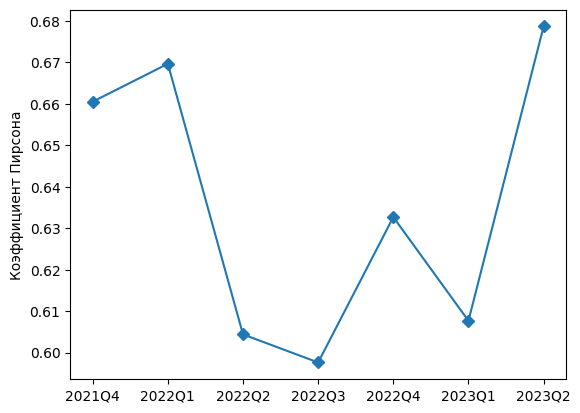

In [26]:
xticks = ['2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2']

plt.plot(pearsons_r, marker='D')
plt.xticks(range(7), xticks)
plt.ylabel('Коэффициент Пирсона')
plt.show()

Рассмотрим подробнее минимальное значение коэффциента Пирсона. Оно получилось по итогам третьего квартала 2022 года.

Посчитаем разницу между показатели средней рыночной стоимости одного квадратного метра общей площади жилого помещения и среднемесячной номинальной начисленной заработной платой работников по полному кругу организаций в этом периоде.

Затем выведем строку с максимальным значением этой разницы.

In [27]:
data_p_s['diff_pri_sal_2022Q3'] = data_p_s['prices_2022Q3'] - data_p_s['salary_2022Q3']

In [28]:
data_p_s.sort_values(['diff_pri_sal_2022Q3'], ascending = False).head(1)

,subjects,prices_2021Q4,prices_2022Q1,prices_2022Q2,prices_2022Q3,prices_2022Q4,prices_2023Q1,prices_2023Q2,salary_2021Q4,salary_2022Q1,salary_2022Q2,salary_2022Q3,salary_2022Q4,salary_2023Q1,salary_2023Q2,diff_pri_sal_2022Q3
32,Краснодарский край,81587,86148,156824,150641,149902,154768,152791,44110,43372,47989,47636,53891,50581,52350,103005


Построим линейный график, на котором отобразим сразу оба параметра.

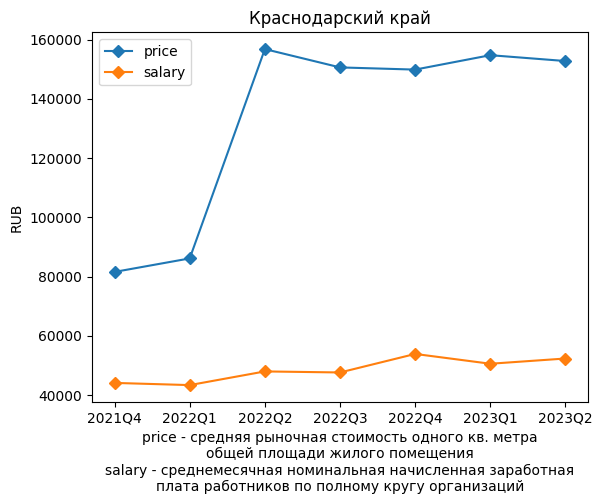

In [36]:
xticks = ['2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2']

plt.plot(range(7), data_p_s.iloc[32, 1:8], marker='D', label = 'price')
plt.plot(range(7), data_p_s.iloc[32, 8:15], marker='D', label = 'salary')
plt.xticks(range(7), xticks)
plt.title('Краснодарский край')
plt.ylabel('RUB')
plt.xlabel('price - средняя рыночная стоимость одного кв. метра\nобщей площади жилого помещения\nsalary - среднемесячная номинальная начисленная заработная\nплата работников по полному кругу организаций')
plt.legend()
plt.show()

Краснодарский край - один из туристических центров России. Вероятно, к повышению цен привел повышенный спрос на недвижимость в качестве инвестиции и/или способа сохранения средств на фоне падения курса рубля.

Возьмем данные по курсу национальной валюты отсюда https://cbr.ru/currency_base/dynamics/

Сформируем датафрейм.

In [30]:
exchange_rate = pd.read_excel('RC_F01_10_2021_T30_04_2023.xlsx', sheet_name = 'RC')

exchange_rate.head()

,nominal,data,curs,cdx
0,1,2023-04-29,80.5093,Доллар США
1,1,2023-04-28,81.5601,Доллар США
2,1,2023-04-27,81.6274,Доллар США
3,1,2023-04-26,81.5499,Доллар США
4,1,2023-04-25,81.2745,Доллар США


Сгруппируем и усредним значения курса по кварталам.

In [31]:
exchange_rate.groupby(exchange_rate['data'].dt.to_period('Q'))['curs'].mean()

data
2021Q4    72.654305
2022Q1    87.347863
2022Q2    66.514140
2022Q3    59.478273
2022Q4    62.693697
2023Q1    72.971143
2023Q2    80.995543
Freq: Q-DEC, Name: curs, dtype: float64

Добавим на предыдущий график значения курса вместе со своей шкалой.

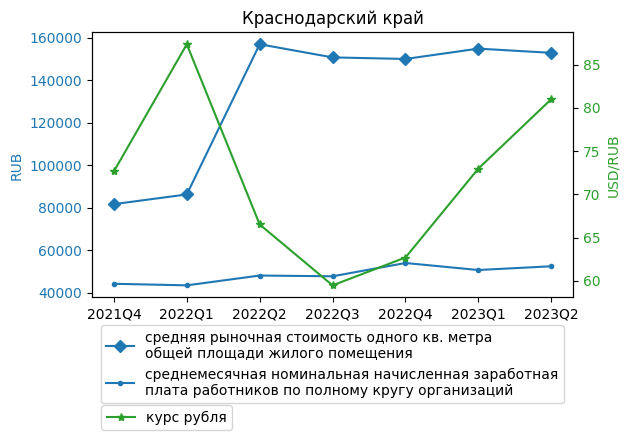

In [32]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('RUB', color=color)
ax1.plot(range(7), data_p_s.iloc[32, 1:8], marker='D', label = 'средняя рыночная стоимость одного кв. метра\nобщей площади жилого помещения', color=color)
ax1.plot(range(7), data_p_s.iloc[32, 8:15], marker='.', label = 'среднемесячная номинальная начисленная заработная\nплата работников по полному кругу организаций', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(range(7), xticks)
ax1.legend(bbox_to_anchor = (0.5, -0.4), loc = 'lower center', borderaxespad = 0)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('USD/RUB', color=color)
ax2.plot(range(7), exchange_rate.groupby(exchange_rate['data'].dt.to_period('Q'))['curs'].mean(), marker='*', label = 'курс рубля', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(bbox_to_anchor = (0.155, -0.5), loc = 'lower center', borderaxespad = 0)

fig.tight_layout()
plt.title('Краснодарский край')
plt.show()

При разном масштабе нельзя утверждать, что стоимость кв. метра выросла во столько же раз, во сколько и курс валюты.

Однако предположение, что недвижимость в Краснодарском крае выросла на фоне снижения курса нац. валюты, подтвердилось.

Максимальное значение коэффициента Пирсона во втором квартале 2023 года. Посчитаем разницу между стоимостью кв. метра и заработной платой для этого временного периода.

In [33]:
data_p_s['diff_pri_sal_2023Q2'] = data_p_s['prices_2023Q2'] - data_p_s['salary_2023Q2']

In [34]:
data_p_s.sort_values(['diff_pri_sal_2023Q2'], ascending = True).head(1)

,subjects,prices_2021Q4,prices_2022Q1,prices_2022Q2,prices_2022Q3,prices_2022Q4,prices_2023Q1,prices_2023Q2,salary_2021Q4,salary_2022Q1,salary_2022Q2,salary_2022Q3,salary_2022Q4,salary_2023Q1,salary_2023Q2,diff_pri_sal_2022Q3,diff_pri_sal_2023Q2
27,Ненецкий автономный округ,73256,73031,76300,78516,80800,82023,83508,97365,96934,110359,102375,113099,108785,111520,-23859,-28012


Высокий уровень зарплат в Ненецком автономном округе связан со спецификой экономики субъекта, которая основана на добыче углеводородов. Отрасль также привлекательна для инвестиций.

Также построим линейный график с обоими показателями.

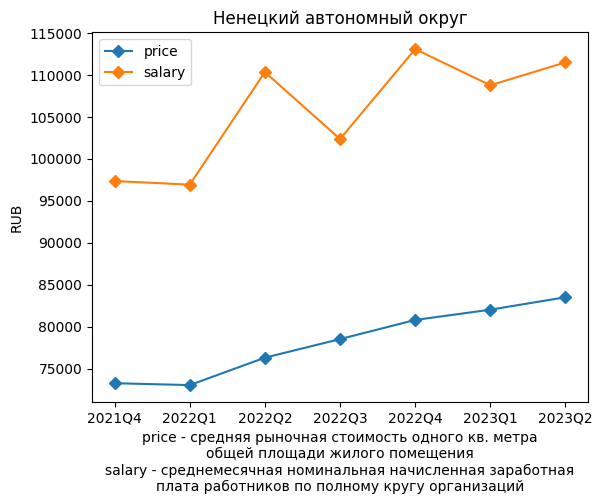

In [37]:
plt.plot(range(7), data_p_s.iloc[27, 1:8], marker='D', label = 'price')
plt.plot(range(7), data_p_s.iloc[27, 8:15], marker='D', label = 'salary')
plt.xticks(range(7), xticks)
plt.title('Ненецкий автономный округ')
plt.ylabel('RUB')
plt.xlabel('price - средняя рыночная стоимость одного кв. метра\nобщей площади жилого помещения\nsalary - среднемесячная номинальная начисленная заработная\nплата работников по полному кругу организаций')
plt.legend()
plt.show()

Несмотря на скачкообразый график среднемесячной номинальной начисленной заработной платы работников по полному кругу организаций, заметна линейная тенденция, при этом наклон "линии" примерно одинаков для обоих показателей.

Поставленные в начале проекта задачи можно считать выполненными.